# Dataset boolean6: implicit conjunction - different predicates applied on a person (reference problem)

Generating sentences of the form

- 1) **c, who is a PROFESSION, saw X, c didn't saw X** -- contradiction 
- 1) **c, who is a PROFESSION, visit d, c didn't  visit d ** -- contradiction
- 1) **c, who is a PROFESSION, bought Y, c didn't  buy Y ** -- contradiction 


- 2) **c, who is a PROFESSION, saw X, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, visit d, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, bought Y, c isn't a PROFESSION ** -- contradiction


- 3) **c, who is a PROFESSION1, saw X, c, who is a PROFESSION2, didn't saw X**  -- non-contradiction
- 3) **c, who is a PROFESSION1, visit d, c, who is a PROFESSION2, didn't visit d**  -- non-contradiction
- 3) **c, who is a PROFESSION1, bought Y, c, who is a PROFESSION2, didn't bought Y**  -- non-contradiction


- 4) **c, who is a PROFESSION, saw X, c, e's father (mother), didn't saw X** -- non-contradiction
- 4) **c, who is a PROFESSION, visit d, c, e's father (mother), didn't visit d** -- non-contradiction
- 4) **c, who is a PROFESSION, bought Y, c, e's father (mother), didn't bought Y** -- non-contradiction


- 5) **c saw Z running COMPLEMENT, c didn't saw Z running** -- contradiction 
- 5) **c saw Z driving COMPLEMENT, c didn't saw Z driving** -- contradiction 



- 6) **c saw X running COMPLEMENT1, c didn't saw X running  COMPLEMENT2** -- non-contradiction
- 6) **c saw X driving COMPLEMENT1, c didn't saw X driving COMPLEMENT2** -- non-contradiction 


X = [a girl running, a blue plane, the new Tesla sport car, the new Marvel movie, a dog chasing a cat, etc.]

Y = [the new Tesla Roadster, etc.]

Z = [name, a girl, a boy]



In [5]:
import numpy as np
import pandas as pd
from word_lists import male_names, female_names, name_list
from word_lists import professions, color_list, city_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

In [6]:
def get_new_item(item_list, src_list):
    size = len(src_list)
    new_item = src_list[np.random.choice(size)]
    while new_item in item_list: 
        new_i = np.random.choice(size)
        new_item = src_list[new_i]
    return new_item

In [7]:
for i in range(len(name_list)):
    name = get_new_item([], name_list)
    new_name = get_new_item([name], name_list)
    assert name != new_name and name in name_list and new_name in name_list

In [8]:
upper_bound = 11000 / 6

COMPLEMENT_runnig = ["from a parade car",
                     "from PERSON's car",
                      "from a COLOR car",
                      "from a COLOR bus",
                      "from a special recently built bus",
                      "from a COLOR school bus",
                      "from a bus going to CITY",
                      "from a COLOR bus with a new engine"]

COMPLEMENT_driving = ["a COLOR car",
                      "in CITY",
                      "PERSON's car",
                      "a COLOR bicicle",
                      "PERSON's bicicle",
                      "an eletric COLOR bicicle",
                      "PERSON's new Tesla Roadster"]

what_I_see = ["a girl running",
              "a blue plane",
              "the new Tesla Roadster",
              "the new Marvel movie from the Russo Brothers", 
              "a dog chasing a cat",
              "the accident",
              "the car crash",
              "a strange add",
              "the city mayor"]

what_I_buy = ["the new Tesla Roadster",
              "the new Marvel movie from the Russo Brothers",
              "a Chilean wine",
              "a Macbook",
              "a cup of coffee",
              "a pizza",
              "a japanese novel"]

- 1) **c, who is a PROFESSION, saw X, c didn't saw X** -- contradiction 
- 1) **c, who is a PROFESSION, visit d, c didn't  visit d ** -- contradiction
- 1) **c, who is a PROFESSION, bought Y, c didn't  buy Y ** -- contradiction 

In [9]:
all_sentences_1 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    person2 = get_new_item([person1], name_list)
    buy = get_new_item([], what_I_buy)
    see = get_new_item([], what_I_see)
    profession = get_new_item([], professions)
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{} didn't saw {}".format(person1, profession, see, person1, see)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{} didn't visit {}".format(person1, profession, person2, person1, person2)
    else:
        sentence = "{}, who is a {}, bought {};{} didn't buy {}".format(person1, profession, buy, person1, buy)
    all_sentences_1.append(sentence)

all_sentences_1 = [sentence.split(";") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)

['Naomi, who is a dentist, saw the new Marvel movie from the Russo Brothers', "Naomi didn't saw the new Marvel movie from the Russo Brothers", 1]
['Jeffrey, who is a flight attendant, visit Harriet', "Jeffrey didn't visit Harriet", 1]
['Scott, who is a lawyer, bought a cup of coffee', "Scott didn't buy a cup of coffee", 1]
['Darren, who is a accountant, saw a dog chasing a cat', "Darren didn't saw a dog chasing a cat", 1]
['Suzanne, who is a receptionist, visit Pearl', "Suzanne didn't visit Pearl", 1]
['Brandon, who is a engineer, bought a pizza', "Brandon didn't buy a pizza", 1]
['Dennis, who is a pilot, saw a girl running', "Dennis didn't saw a girl running", 1]
['Christopher, who is a cop, visit Ken', "Christopher didn't visit Ken", 1]
['Jason, who is a baker, bought a Chilean wine', "Jason didn't buy a Chilean wine", 1]
['Maurice, who is a plumber, saw a strange add', "Maurice didn't saw a strange add", 1]


- 2) **c, who is a PROFESSION, saw X, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, visit d, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, bought Y, c isn't a PROFESSION ** -- contradiction

In [10]:
all_sentences_2 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    person2 = get_new_item([person1], name_list)
    buy = get_new_item([], what_I_buy)
    see = get_new_item([], what_I_see)
    profession = get_new_item([], professions)
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{} isn't a {}".format(person1, profession, see, person1, profession)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{} isn't a {}".format(person1, profession, person2, person1, profession)
    else:
        sentence = "{}, who is a {}, bought {};{} isn't a {}".format(person1, profession, buy, person1, profession)
    all_sentences_2.append(sentence)

all_sentences_2 = [sentence.split(";") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)

['Lance, who is a nurse, saw the accident', "Lance isn't a nurse", 1]
['Gloria, who is a scientist, visit Darryl', "Gloria isn't a scientist", 1]
['Glenn, who is a engineer, bought the new Tesla Roadster', "Glenn isn't a engineer", 1]
['Holly, who is a judge, saw a dog chasing a cat', "Holly isn't a judge", 1]
['Mattie, who is a baker, visit Darlene', "Mattie isn't a baker", 1]
['Alvin, who is a plumber, bought the new Marvel movie from the Russo Brothers', "Alvin isn't a plumber", 1]
['Karl, who is a engineer, saw the city mayor', "Karl isn't a engineer", 1]
['Lola, who is a journalist, visit Joy', "Lola isn't a journalist", 1]
['Paula, who is a butcher, bought a Chilean wine', "Paula isn't a butcher", 1]
['Willie, who is a chef, saw a girl running', "Willie isn't a chef", 1]


- 3) **c, who is a PROFESSION1, saw X, c, who is a PROFESSION2, didn't saw X**  -- non-contradiction
- 3) **c, who is a PROFESSION1, visit d, c, who is a PROFESSION2, didn't visit d**  -- non-contradiction
- 3) **c, who is a PROFESSION1, bought Y, c, who is a PROFESSION2, didn't bought Y**  -- non-contradiction

In [11]:
all_sentences_3 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    person2 = get_new_item([person1], name_list)
    buy = get_new_item([], what_I_buy)
    see = get_new_item([], what_I_see)
    profession1 = get_new_item([], professions)
    profession2 = get_new_item([profession1], professions)
    assert profession1 != profession2 
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{}, who is a {}, didn't saw {}".format(person1, profession1, see, person1, profession2, see)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{}, who is a {}, didn't visit {}".format(person1, profession1, person2, person1, profession2, person2)
    else:
        sentence = "{}, who is a {}, bought {};{}, who is a {}, didn't buy {}".format(person1, profession1, buy, person1, profession2, buy)
    all_sentences_3.append(sentence)

all_sentences_3 = [sentence.split(";") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)

['Hugh, who is a accountant, saw a girl running', "Hugh, who is a cleaner, didn't saw a girl running", 0]
['Stella, who is a vet, visit Franklin', "Stella, who is a plumber, didn't visit Franklin", 0]
['Kathryn, who is a nurse, bought a cup of coffee', "Kathryn, who is a cashier, didn't buy a cup of coffee", 0]
['Terrance, who is a plumber, saw a strange add', "Terrance, who is a receptionist, didn't saw a strange add", 0]
['Roger, who is a chef, visit Lonnie', "Roger, who is a technician, didn't visit Lonnie", 0]
['Melanie, who is a plumber, bought a pizza', "Melanie, who is a painter, didn't buy a pizza", 0]
['Matthew, who is a photographer, saw the car crash', "Matthew, who is a doctor, didn't saw the car crash", 0]
['Shelley, who is a builder, visit Esther', "Shelley, who is a scientist, didn't visit Esther", 0]
['Tonya, who is a technician, bought the new Tesla Roadster', "Tonya, who is a dentist, didn't buy the new Tesla Roadster", 0]
['Erin, who is a accountant, saw the car cras

- 4) **c, who is a PROFESSION, saw X, c, e's father (mother), didn't saw X** -- non-contradiction
- 4) **c, who is a PROFESSION, visit d, c, e's father (mother), didn't visit d** -- non-contradiction
- 4) **c, who is a PROFESSION, bought Y, c, e's father (mother), didn't bought Y** -- non-contradiction

In [12]:
all_sentences_4 = []
for i in range(int(upper_bound)):
    if i % 2 == 0:
        person1 = get_new_item([], female_names)
        parent = "mother"
    else:
        person1 = get_new_item([], male_names)
        parent = "father"
    person2 = get_new_item([person1], name_list)
    person3 = get_new_item([person1, person2], name_list)
    buy = get_new_item([], what_I_buy)
    see = get_new_item([], what_I_see)
    profession1 = get_new_item([], professions)
    profession2 = get_new_item([profession1], professions)
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{}, {}'s {}, didn't saw {}".format(person1, profession1, see, person1, person3, parent, see)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{}, {}'s {}, didn't visit {}".format(person1, profession1, person2, person1,person3, parent,person2)
    else:
        sentence = "{}, who is a {}, bought {};{}, {}'s {}, didn't buy {}".format(person1, profession1, buy, person1, person3, parent, buy)
    all_sentences_4.append(sentence)

all_sentences_4 = [sentence.split(";") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)

['Dolores, who is a secretary, saw the city mayor', "Dolores, Eileen's mother, didn't saw the city mayor", 0]
['Freddie, who is a builder, visit Jane', "Freddie, Iris's father, didn't visit Jane", 0]
['Mabel, who is a nurse, bought the new Tesla Roadster', "Mabel, Victoria's mother, didn't buy the new Tesla Roadster", 0]
['Joshua, who is a secretary, saw the city mayor', "Joshua, Nellie's father, didn't saw the city mayor", 0]
['Cynthia, who is a vet, visit Faye', "Cynthia, Tom's mother, didn't visit Faye", 0]
['Bobby, who is a scientist, bought a cup of coffee', "Bobby, Heidi's father, didn't buy a cup of coffee", 0]
['Lena, who is a dentist, saw the accident', "Lena, Rodney's mother, didn't saw the accident", 0]
['Nathaniel, who is a secretary, visit Lindsey', "Nathaniel, Clayton's father, didn't visit Lindsey", 0]
['Esther, who is a nurse, bought the new Marvel movie from the Russo Brothers', "Esther, Steven's mother, didn't buy the new Marvel movie from the Russo Brothers", 0]
['Ky

- 5) **c saw X running COMPLEMENT, c didn't saw X running** -- contradiction 
- 5) **c saw X driving COMPLEMENT, c didn't saw X driving** -- contradiction 

In [16]:
all_sentences_5 = []
for i in range(int(upper_bound + 1)):
    person1 = get_new_item([], name_list)
    object_list = [get_new_item([person1], name_list), "a girl", "a boy"]
    direct_object = get_new_item([], object_list)
    if i % 2 == 0:
        verb = "running"
        complement = get_new_item([], COMPLEMENT_runnig)
    else:
        verb = "driving"
        complement = get_new_item([], COMPLEMENT_driving)
    person2 = get_new_item([person1, direct_object], name_list)
    color = get_new_item([], color_list)
    city = get_new_item([], city_list)
    complement = complement.replace("PERSON's", person2 + "'s")
    complement = complement.replace("COLOR", color)
    complement = complement.replace("CITY", city)
    sentence = "{} saw {} {} {},{} didn't saw {} {}".format(person1,
                                                             direct_object,
                                                             verb,
                                                             complement,
                                                             person1,
                                                             direct_object,
                                                             verb)
    all_sentences_5.append(sentence)
    
all_sentences_5 = [sentence.split(",") + [1] for sentence in all_sentences_5]


for sentence in all_sentences_5[0:10]:
    print(sentence)

['Alfred saw Eric running from a black bus', "Alfred didn't saw Eric running", 1]
["Anita saw a boy driving Vivian's bicicle", "Anita didn't saw a boy driving", 1]
["Harvey saw Hugh running from Tara's car", "Harvey didn't saw Hugh running", 1]
["Elsie saw Viola driving Megan's bicicle", "Elsie didn't saw Viola driving", 1]
['Felix saw Melody running from a bus going to Baia Mare', "Felix didn't saw Melody running", 1]
['Georgia saw Richard driving in Slatina', "Georgia didn't saw Richard driving", 1]
['Jeanette saw a boy running from a parade car', "Jeanette didn't saw a boy running", 1]
["Vernon saw a girl driving Edna's car", "Vernon didn't saw a girl driving", 1]
['Joseph saw Barbara running from a mango school bus', "Joseph didn't saw Barbara running", 1]
['Norma saw a boy driving a lemon bicicle', "Norma didn't saw a boy driving", 1]


- 6) **c saw X running COMPLEMENT1, c didn't saw X running  COMPLEMENT2** -- non-contradiction
- 6) **c saw X driving COMPLEMENT1, c didn't saw X driving COMPLEMENT2** -- non-contradiction 

In [17]:
all_sentences_6 = []
for i in range(int(upper_bound + 1)):
    person1 = get_new_item([], name_list)
    object_list = [get_new_item([person1], name_list), "a girl", "a boy"]
    direct_object = get_new_item([], object_list)
    if i % 2 == 0:
        verb = "running"
        COMPLEMENT = COMPLEMENT_runnig 
    else:
        verb = "driving"
        COMPLEMENT = COMPLEMENT_driving 
    
    complement1 = get_new_item([], COMPLEMENT)
    complement2 = get_new_item([complement1], COMPLEMENT)
    person2 = get_new_item([person1, direct_object], name_list)
    color = get_new_item([], color_list)
    city = get_new_item([], city_list)
    complement1 = complement1.replace("PERSON's", person2 + "'s")
    complement1 = complement1.replace("COLOR", color)
    complement1 = complement1.replace("CITY", city)
    person2 = get_new_item([person1, direct_object, person2], name_list)
    color = get_new_item([], color_list)
    city = get_new_item([], city_list)
    complement2 = complement2.replace("PERSON's", person2 + "'s")
    complement2 = complement2.replace("COLOR", color)
    complement2 = complement2.replace("CITY", city)
    sentence = "{} saw {} {} {}, {} didn't saw {} {} {}".format(person1,
                                                             direct_object,
                                                             verb,
                                                             complement1,
                                                             person1,
                                                             direct_object,
                                                             verb,
                                                             complement2)
    all_sentences_6.append(sentence)
    
all_sentences_6 = [sentence.split(",") + [0] for sentence in all_sentences_6]

for sentence in all_sentences_6[0:10]:
    print(sentence)

['Marc saw Alma running from a bus going to Reghin', " Marc didn't saw Alma running from a lemon school bus", 0]
['Felix saw Leslie driving an eletric icy bicicle', " Felix didn't saw Leslie driving a purple car", 0]
['Lillian saw Phyllis running from a bus going to Cluj-Napoca', " Lillian didn't saw Phyllis running from a white bus", 0]
['Erica saw Brandon driving a yellow bicicle', " Erica didn't saw Brandon driving a blue car", 0]
["Susan saw Lance running from Ernest's car", " Susan didn't saw Lance running from a blue car", 0]
['Julio saw Justin driving a orange car', " Julio didn't saw Justin driving a yellow bicicle", 0]
["Maureen saw a boy running from Dustin's car", " Maureen didn't saw a boy running from a blue bus with a new engine", 0]
['Daisy saw Vickie driving a salmon bicicle', " Daisy didn't saw Vickie driving a white car", 0]
['Jenny saw a boy running from a black bus', " Jenny didn't saw a boy running from Eunice's car", 0]
["Beatrice saw a boy driving Wanda's new Tes

In [18]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)
np.random.shuffle(all_sentences_5)
np.random.shuffle(all_sentences_6)


size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)
size5 = len(all_sentences_5)
size6 = len(all_sentences_6)


all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
all_sentences += all_sentences_5 + all_sentences_6
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("type 5 size = {}".format(size5))
print("type 6 size = {}".format(size6))
print("total size = {}".format(size))

type 1 size = 1833
type 2 size = 1833
type 3 size = 1833
type 4 size = 1833
type 5 size = 1834
type 6 size = 1834
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [19]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Priscilla saw Derrick driving Barry's car,Priscilla didn't saw Derrick driving an eletr...,0
10996,"Linda, who is a cop, saw a blue plane","Linda, Ashley's mother, didn't saw a blue plane",0
10997,"Christian, who is a carpenter, bought a pizza","Christian, Antonio's father, didn't buy a pizza",0
10998,Josephine saw a boy driving a salmon bicicle,Josephine didn't saw a boy driving Ada's bicicle,0
10999,"Christine, who is a plumber, bought the new Te...","Christine, who is a journalist, didn't buy the...",0


#### Looking at the label distribution

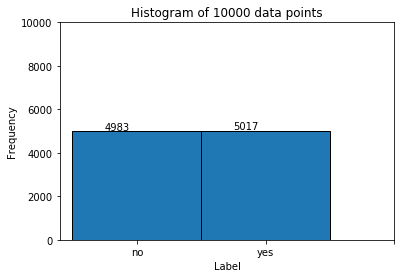

In [20]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "boolean6_train.png")

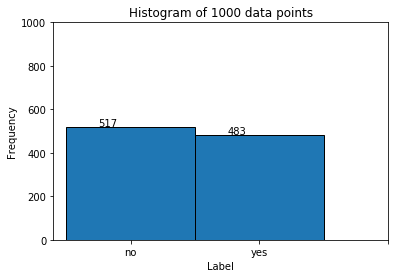

In [21]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "boolean6_test.png")

### Saving to CSV

In [22]:
df_train.to_csv("boolean6_train.csv", index=False)
df_test.to_csv("boolean6_test.csv", index=False)